# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Feb 25 09:31:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.1+cu116


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. $Automotive$: Computer vision is being used to develop autonomous vehicles, allowing them to navigate and detect objects in their environment.

2. $Manufacturing$: Computer vision is being used to automate quality assurance processes, allowing for faster and more accurate inspections.

3. $Retail$: Computer vision is being used for product recognition and tracking, as well as for facial recognition for customer identification and security.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

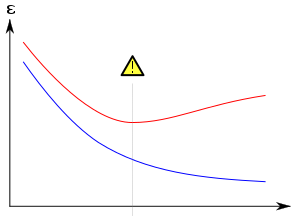
<br>
In machine learning, `Overfitting` occurs when a model performs well on training data and poorly on test data or new data (i.e does not generalize to new data).

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. $Simplifying$ $the$ $model$ $architecture$: This involves reducing the complexity of the model by removing unnecessary layers, reducing the number of neurons, or decreasing the number of parameters. This reduces the risk of the model overfitting to the training data, but can also result in a decrease in performance if the model becomes too simple.
2. $Early$ $stopping$: This technique involves monitoring the performance of the model on a validation set during training and stopping the training process when the performance stops improving. This helps to prevent the model from overfitting to the training data.
3. $Data$ $augmentation$: This technique involves creating new training examples by applying various transformations to the existing data, such as rotation, scaling, or flipping. By increasing the amount of training data, it helps the model to learn more generalizable patterns and reduce the risk of overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision.datasets import MNIST
from torchvision import transforms

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
print(train_data[0][0].shape)

len(train_data), len(test_data)

torch.Size([1, 28, 28])


(60000, 10000)

In [5]:
class_names = train_data.classes

## 6. Visualize at least 5 different samples of the MNIST training dataset.

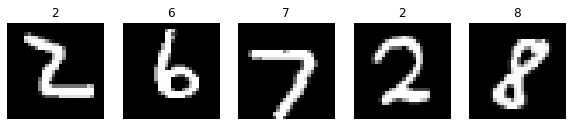

In [6]:
import matplotlib.pyplot as plt
import random

# Set the range of numbers
start_index = 0
end_index = len(train_data)

plt.figure(figsize=(10, 5))

for i in range(5):
  # Generate a random index
  random_index = random.randint(start_index, end_index)
  image = train_data[random_index][0].permute(1, 2, 0)
  label = train_data[random_index][1]
  plt.subplot(1, 5, i+1)
  plt.imshow(image, cmap="gray")
  plt.title(label)
  plt.axis("off");

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    shuffle=True,
    batch_size=BATCH_SIZE
)

test_dataloader = DataLoader(
    dataset=test_data,
    shuffle=False,
    batch_size=BATCH_SIZE
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
from torch import nn

class TinyVGGModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=(2, 2)
        )
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=(2, 2)
        )
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7,
            out_features=output_shape
        )
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    z = self.block_1(x)
    # print(z.shape)
    z = self.block_2(z)
    # print(z.shape)
    z = self.classifier(z)
    return z
    # return self.classifier(self.block_2(self.block_1(x)))

In [9]:
model_0 = TinyVGGModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0

TinyVGGModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [10]:
# try:
#   import netron
# except:
#   print("Install Netron ...")
#   !pip install -q netron
#   import netron


In [11]:
# torch.save(model_0.state_dict(), 'model_0.pt')

# # Launch Netron
# netron.start('model_0.pt')

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.
    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [13]:
from timeit import default_timer as timer

def calculate_train_time(start: float, end: float, device: torch.device = None) -> float:
  """Calculates and Displays how long a model takes to train 
  
  Args:
      start (float): Start time of computation (preferred in timeit format). 
      end (float): End time of computation.
      device ([type], optional): Device that compute is running on. Defaults to None.

  Returns:
      float: time between start and end in seconds (higher is longer).
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [14]:
from tqdm.auto import tqdm

def train_step(
    data_loader: torch.utils.data.DataLoader,
    model: nn.Module,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):
  
  # Initialize train loss and accuracy
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(data_loader):

    # Send data to target device
    X, y = X.to(device), y.to(device)

    # Set model to train mode
    model.train()

    # 1. Forward pass
    y_logits = model(X)

    # 2. Calculate Loss / Accuarcy
    loss = loss_fn(y_logits, y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y, y_pred=torch.argmax(y_logits, dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Scale Loss and Accuracy
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  # Print what's happening
  print(f"Training Loss {train_loss:.5f} | Training Accuracy {train_acc:.2f}%\n")

In [15]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):
  
  # Initialize train loss and accuracy
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(data_loader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # Set model to test mode
      model.eval()

      # 1. Forward Pass
      test_logits = model(X)

      # 2. Calculate Test loss and accuarcy
      test_loss += loss_fn(test_logits, y)

      test_acc += accuracy_fn(y_true=y, y_pred=torch.argmax(test_logits, dim=1))

    # Scale Test loss and accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # Print what's happening
    print(f"Test Loss {test_loss:.5f} | Test Accuracy {test_acc:.2f}%\n")

In [16]:
model_cpu = TinyVGGModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

# Setup loss and optimizer functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_cpu.parameters(),
    lr=0.1
)

start_time_cpu = timer()

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch {epoch+1} -------")

  train_step(
      data_loader=train_dataloader,
      model=model_cpu,
      optimizer=optimizer,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device="cpu",
  )

  test_step(
      data_loader=test_dataloader,
      model=model_cpu,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device="cpu",
  )

end_time_cpu = timer()

total_cpu_train_time = calculate_train_time(start=start_time_cpu, end=end_time_cpu, device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 -------
Training Loss 0.29099 | Training Accuracy 90.27%

Test Loss 0.07983 | Test Accuracy 97.53%

Epoch 2 -------
Training Loss 0.07076 | Training Accuracy 97.77%

Test Loss 0.05006 | Test Accuracy 98.39%

Epoch 3 -------
Training Loss 0.05617 | Training Accuracy 98.20%

Test Loss 0.05220 | Test Accuracy 98.25%

Epoch 4 -------
Training Loss 0.04867 | Training Accuracy 98.51%

Test Loss 0.05401 | Test Accuracy 98.20%

Epoch 5 -------
Training Loss 0.04251 | Training Accuracy 98.68%

Test Loss 0.03493 | Test Accuracy 98.76%

Train time on cpu: 200.621 seconds


In [17]:
model_gpu = TinyVGGModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

# Setup loss and optimizer functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_gpu.parameters(),
    lr=0.1
)



start_time_gpu = timer()

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch {epoch+1} -------")

  train_step(
      data_loader=train_dataloader,
      model=model_gpu,
      optimizer=optimizer,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device,
  )

  test_step(
      data_loader=test_dataloader,
      model=model_gpu,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device,
  )

end_time_gpu = timer()

total_gpu_train_time = calculate_train_time(start=start_time_gpu, end=end_time_gpu, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 -------
Training Loss 0.26577 | Training Accuracy 91.13%

Test Loss 0.08046 | Test Accuracy 97.51%

Epoch 2 -------
Training Loss 0.06856 | Training Accuracy 97.80%

Test Loss 0.05815 | Test Accuracy 98.20%

Epoch 3 -------
Training Loss 0.05275 | Training Accuracy 98.37%

Test Loss 0.04906 | Test Accuracy 98.44%

Epoch 4 -------
Training Loss 0.04559 | Training Accuracy 98.54%

Test Loss 0.04759 | Test Accuracy 98.62%

Epoch 5 -------
Training Loss 0.03987 | Training Accuracy 98.76%

Test Loss 0.03744 | Test Accuracy 98.86%

Train time on cuda: 64.922 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

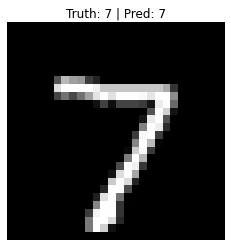

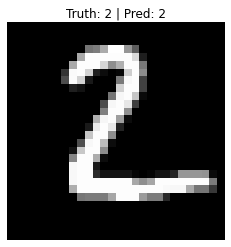

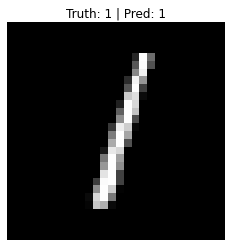

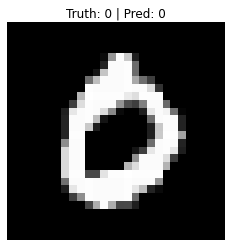

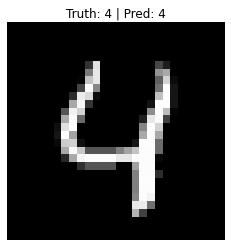

In [18]:
num_to_plot = 5 
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [19]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [20]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()

0it [00:00, ?it/s]

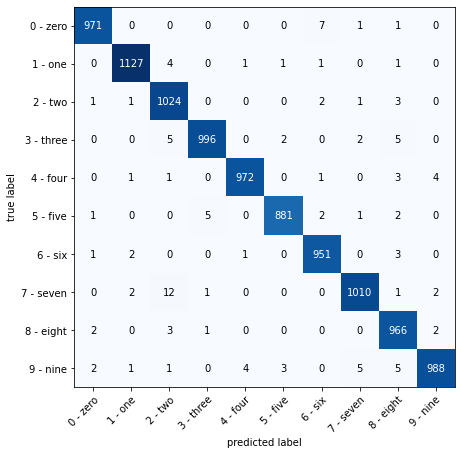

In [21]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [22]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [23]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [24]:
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [25]:

# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [26]:
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [27]:
# model_2 is the same architecture as TinyVGGModel
model_2 = TinyVGGModel(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2
     

TinyVGGModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
from torch import nn
from tqdm.auto import tqdm
# from torchmetrics import Accuracy

# acc_fn = Accuracy(num_classes=len(fashion_mnist_class_names), task="multiclass").to(device) 
model_2 = TinyVGGModel(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)

# Setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch {epoch+1} -------")

  train_step(
      data_loader=fashion_mnist_train_dataloader,
      model=model_2,
      optimizer=optimizer,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device,
  )

  test_step(
      data_loader=fashion_mnist_test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device,
  )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 -------
Training Loss 1.90496 | Training Accuracy 31.13%

Test Loss 0.73355 | Test Accuracy 72.20%

Epoch 2 -------
Training Loss 0.58390 | Training Accuracy 78.43%

Test Loss 0.51329 | Test Accuracy 81.59%

Epoch 3 -------
Training Loss 0.46100 | Training Accuracy 83.31%

Test Loss 0.45646 | Test Accuracy 83.23%

Epoch 4 -------
Training Loss 0.41412 | Training Accuracy 85.00%

Test Loss 0.41585 | Test Accuracy 85.28%

Epoch 5 -------
Training Loss 0.38666 | Training Accuracy 86.06%

Test Loss 0.38900 | Test Accuracy 86.25%



In [32]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)    

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [33]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1376

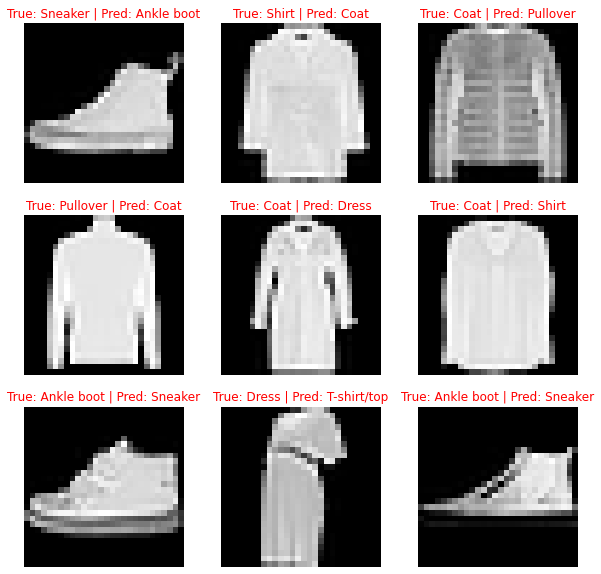

In [34]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);